In [178]:
import numpy as np  
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.externals import joblib
# from keras import Sequential
# from keras.layers import LSTM, Dropout, Dense
# from sklearn.linear_model import LinearRegression, SGDRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn import preprocessing 
# from xgboost import XGBRegressor, plot_importance



In [179]:
train_por = pd.read_csv('student-por.csv')
train_mat  = pd.read_csv('student-mat.csv')

In [180]:
train_por.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [181]:
train_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [182]:
train_por.shape

(649, 33)

In [183]:
train_por.dropna().shape #no null values in train_por

(649, 33)

In [184]:
train_mat.shape

(395, 33)

In [185]:
train_mat.dropna().shape #no null values in train_mat


(395, 33)

In [186]:
train_por['subject']='Portuguese'

In [187]:
train_mat['subject']='Maths'


In [188]:
train=pd.concat([train_por, train_mat], axis=0) #combining two data files with subject as discriminant column to distinguish columns

In [189]:
train.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,Portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,Portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,Portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,Portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,Portuguese


In [190]:
train.to_csv('student.csv', index=False)

In [191]:
train = pd.concat([train,pd.get_dummies(train['school'], prefix='school',dummy_na=True)],axis=1).drop(['school'],axis=1)
train = pd.concat([train,pd.get_dummies(train['sex'], prefix='sex',dummy_na=True)],axis=1).drop(['sex'],axis=1)
train = pd.concat([train,pd.get_dummies(train['address'], prefix='address',dummy_na=True)],axis=1).drop(['address'],axis=1)
train = pd.concat([train,pd.get_dummies(train['famsize'], prefix='famsize',dummy_na=True)],axis=1).drop(['famsize'],axis=1)
train = pd.concat([train,pd.get_dummies(train['Pstatus'], prefix='Pstatus',dummy_na=True)],axis=1).drop(['Pstatus'],axis=1)
train = pd.concat([train,pd.get_dummies(train['Mjob'], prefix='Mjob',dummy_na=True)],axis=1).drop(['Mjob'],axis=1)
train = pd.concat([train,pd.get_dummies(train['Fjob'], prefix='Fjob',dummy_na=True)],axis=1).drop(['Fjob'],axis=1)
train = pd.concat([train,pd.get_dummies(train['reason'], prefix='reason',dummy_na=True)],axis=1).drop(['reason'],axis=1)
train = pd.concat([train,pd.get_dummies(train['guardian'], prefix='guardian',dummy_na=True)],axis=1).drop(['guardian'],axis=1)
train = pd.concat([train,pd.get_dummies(train['schoolsup'], prefix='schoolsup',dummy_na=True)],axis=1).drop(['schoolsup'],axis=1)
train = pd.concat([train,pd.get_dummies(train['famsup'], prefix='famsup',dummy_na=True)],axis=1).drop(['famsup'],axis=1)
train = pd.concat([train,pd.get_dummies(train['paid'], prefix='paid',dummy_na=True)],axis=1).drop(['paid'],axis=1)
train = pd.concat([train,pd.get_dummies(train['activities'], prefix='activities',dummy_na=True)],axis=1).drop(['activities'],axis=1)
train = pd.concat([train,pd.get_dummies(train['nursery'], prefix='nursery',dummy_na=True)],axis=1).drop(['nursery'],axis=1)
train = pd.concat([train,pd.get_dummies(train['higher'], prefix='higher',dummy_na=True)],axis=1).drop(['higher'],axis=1)
train = pd.concat([train,pd.get_dummies(train['internet'], prefix='internet',dummy_na=True)],axis=1).drop(['internet'],axis=1)
train = pd.concat([train,pd.get_dummies(train['romantic'], prefix='romantic',dummy_na=True)],axis=1).drop(['romantic'],axis=1)
train = pd.concat([train,pd.get_dummies(train['subject'], prefix='subject',dummy_na=True)],axis=1).drop(['subject'],axis=1);




In [192]:
train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,higher_nan,internet_no,internet_yes,internet_nan,romantic_no,romantic_yes,romantic_nan,subject_Maths,subject_Portuguese,subject_nan
0,18,4,4,2,2,0,4,3,4,1,...,0,1,0,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,1,0,1,0,0,0,1,0
2,15,1,1,1,2,0,4,3,2,2,...,0,0,1,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,0,1,0,0,1,0,0,1,0
4,16,3,3,1,2,0,4,3,2,1,...,0,1,0,0,1,0,0,0,1,0


In [193]:

train = train.drop(['sex_nan'],axis=1)
train = train.drop(['address_nan'],axis=1)
train = train.drop(['famsize_nan'],axis=1)
train = train.drop(['Pstatus_nan'],axis=1)
train = train.drop(['Mjob_nan'],axis=1)
train = train.drop(['Fjob_nan'],axis=1)
train = train.drop(['reason_nan'],axis=1)
train = train.drop(['guardian_nan'],axis=1)
train = train.drop(['schoolsup_nan'],axis=1)
train = train.drop(['famsup_nan'],axis=1)
train = train.drop(['paid_nan'],axis=1)
train = train.drop(['activities_nan'],axis=1)
train = train.drop(['nursery_nan'],axis=1)
train = train.drop(['higher_nan'],axis=1)
train = train.drop(['internet_nan'],axis=1)
train = train.drop(['romantic_nan'],axis=1)
train = train.drop(['subject_nan'],axis=1);

In [194]:
train.head()
train.to_csv('students.csv', index=False)
data = pd.read_csv('students.csv')
data.head()
data['FinalGrade'] = 'na'
data.loc[(data.G3 >= 18) & (data.G3 <= 20), 'FinalGrade'] = 'Excellent'
data.loc[(data.G3 >= 15) & (data.G3 <= 17), 'FinalGrade'] = 'Good' 
data.loc[(data.G3 >= 11) & (data.G3 <= 14), 'FinalGrade'] = 'Satisfactory' 
data.loc[(data.G3 >= 6) & (data.G3 <= 10), 'FinalGrade'] = 'Poor' 
data.loc[(data.G3 >= 0) & (data.G3 <= 5), 'FinalGrade'] = 'Failure' 

data.loc[(data.G1 >= 18) & (data.G1 <= 20), 'Grade1'] = 'Excellent'
data.loc[(data.G1 >= 15) & (data.G1 <= 17), 'Grade1'] = 'Good' 
data.loc[(data.G1 >= 11) & (data.G1 <= 14), 'Grade1'] = 'Satisfactory' 
data.loc[(data.G1 >= 6) & (data.G1 <= 10), 'Grade1'] = 'Poor' 
data.loc[(data.G1 >= 0) & (data.G1 <= 5), 'Grade1'] = 'Failure' 



data.loc[(data.G2 >= 18) & (data.G2 <= 20), 'Grade2'] = 'Excellent'
data.loc[(data.G2 >= 15) & (data.G2 <= 17), 'Grade2'] = 'Good' 
data.loc[(data.G2 >= 11) & (data.G2 <= 14), 'Grade2'] = 'Satisfactory' 
data.loc[(data.G2 >= 6) & (data.G2 <= 10), 'Grade2'] = 'Poor' 
data.loc[(data.G2 >= 0) & (data.G2 <= 5), 'Grade2'] = 'Failure' 

data.head(5)
train=data
lb=LabelEncoder()
lb.fit(train['FinalGrade'])
train['FinalGrade']=lb.transform(train['FinalGrade'])
lb.fit(train['Grade2'])
train['Grade2']=lb.transform(train['Grade2'])
lb.fit(train['Grade1'])
train['Grade1']=lb.transform(train['Grade1'])

In [195]:
y=train[['FinalGrade']]
train = train.drop(['G3'],axis=1);
train = train.drop(['FinalGrade'],axis=1);
train = train.drop(['G2'],axis=1);
train = train.drop(['G1'],axis=1);

In [196]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train,y,random_state=0)

In [197]:
y_train.shape

(783, 1)

In [198]:
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import mean_squared_error,log_loss,roc_auc_score,accuracy_score,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_val)
y_predict=lr.predict_proba(x_val)


C:\Users\Siddu\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddu\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddu\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [199]:
# y_pred=y_pred.astype('int')


In [200]:
log_loss(y_val,y_predict)

0.800090477693267

In [201]:
#accuracy_score(y,y_pred)

In [202]:
# lr.score(x_val, y_val)

In [203]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()

svc.fit(x_train, y_train)

y_pred = svc.predict(x_val)



C:\Users\Siddu\Miniconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Siddu\Miniconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [204]:
accuracy_score(y_val,y_pred)

0.7279693486590039

In [205]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100,min_samples_leaf=2)

random_forest.fit(x_train, y_train)

y_pred_prob = random_forest.predict_proba(x_val)
y_pred= random_forest.predict(x_val)


C:\Users\Siddu\Miniconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [206]:
accuracy_score(y_val,y_pred)

0.789272030651341

In [207]:
#log_loss(y_val,y_pred_prob)

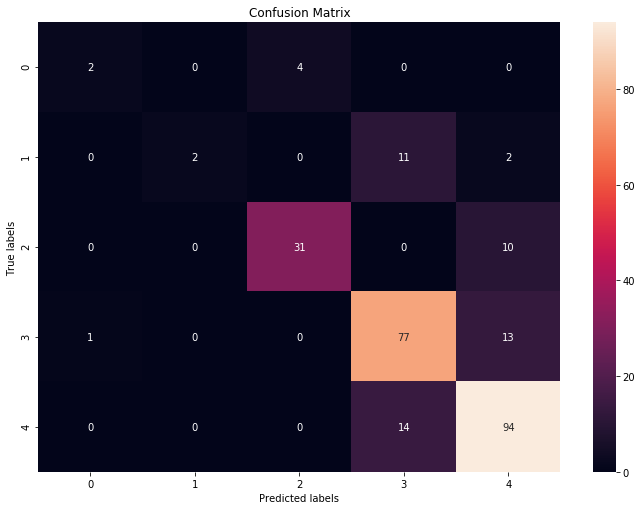

In [208]:
labels = list(range(0,24))
import seaborn as sns    
cm=confusion_matrix(y_val,y_pred)
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);